<a href="https://colab.research.google.com/github/Robprogram2002/practice_repository/blob/master/Fisica_estadistica_problema4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Parametros de la corrida

N = 1000 # Número de caminantes aleatorios
n = 50 # Número de pasos realizados por cada caminante
x0 = 0 # Posición de inicio
q = 1/3 # Probabilidad de moverse hacia la izquierda
p = 2/3 # Probabilidad de moverse hacia la derecha
L = 1

In [3]:
# Creamos una función cuyo objetivo es devolver los valores -1 o 1 aleatoriamente
# de acuerdo a las probalidades p y q pasadas como parametros
def sesgo(prob_q):
  x = np.random.uniform(0,1)
  if (x <= prob_q):
    return -1
  else:
    return 1

In [4]:
# Creamos una función que actualice el estado de cada caminante después
# de dar un paso ya sea a la izquierda o a la derecha.
def avanzar(caminantes, paso, prob_q):
  """
  caminantes: es la matriz de caminantes
  paso: es el número de pasos realizados hasta antes del movimiento actual
  """
  for i in range(caminantes.shape[0]):
    caminantes[i, paso+1] = caminantes[i, paso] + sesgo(prob_q)*L

In [5]:
# La siguiente función se encarga de realizar los n avances para cada caminante
# y devuelve una matriz con los datos

def corrida(N, n, x0, q):
  # Creamos una matriz de tamaño Nx(n+1) llamada 'caminantes'. Cada elemento
  # de este array representa la variable aleatoria (es decir los pasos desde la
  # posición cero) de uno de los N caminantes después de n pasos. Inicializamos
  # dicho valor con la posición inicial de cada caminante.

  # p.ej. el elemento de matriz ab es el valor de la variable aleatoria del caminante
  # a después de b pasos.
  caminantes = np.full((N,n+1), x0)

  # realizamos n avances para cada caminante
  for j in range(n):
    avanzar(caminantes, j, q)
  return caminantes

In [6]:
datos = pd.DataFrame(corrida(N, n, x0, q))
datos.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0,1,2,1,2,3,4,3,4,5,...,19,20,21,20,19,18,19,20,19,18
1,0,1,2,1,2,3,4,5,6,5,...,13,14,15,16,17,18,17,16,15,16
2,0,1,2,1,2,3,4,5,6,7,...,19,18,17,18,17,18,19,20,21,22
3,0,-1,0,-1,0,-1,-2,-3,-2,-1,...,13,14,15,14,15,16,17,16,17,18
4,0,1,2,1,2,1,0,1,2,1,...,9,8,9,10,11,12,13,14,15,14


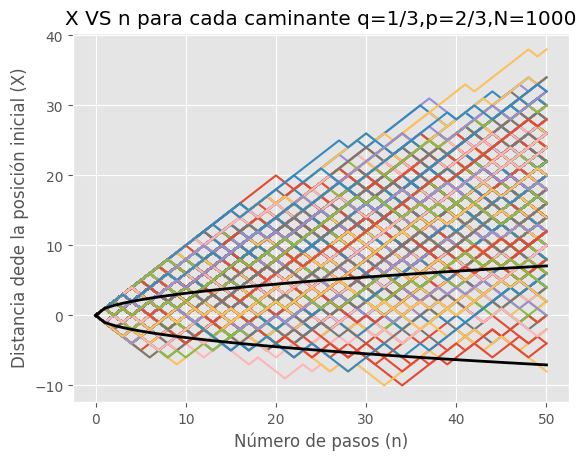

In [7]:
# a) Grafica de X VS n para cada caminante
X = datos.columns.to_list()
Y = np.sqrt(X)

for i in range(datos.shape[0]):
  plt.plot(X, datos.iloc[i])
plt.plot(X, Y, 'black', lw = 2)
plt.plot(X, -Y, 'black', lw = 2)
plt.xlabel("Número de pasos (n)")
plt.ylabel("Distancia dede la posición inicial (X)")
plt.title("X VS n para cada caminante q=1/3,p=2/3,N=1000")
plt.show()

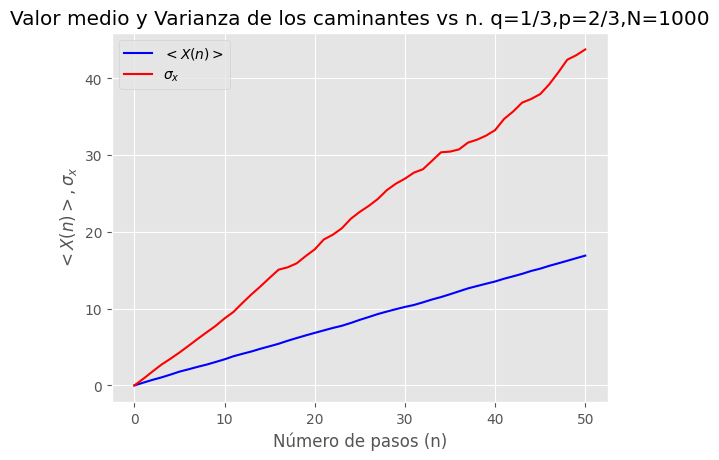

In [8]:
#  Grafica del valor medio y la varianza
Y_mean = [np.mean(datos[j]) for j in range(datos.shape[1])]
Y_var = [np.var(datos[j]) for j in range(datos.shape[1])]

plt.plot(X, Y_mean, "blue", label = "$<X(n)>$")
plt.plot(X, Y_var, "red", label = "$\sigma_x$")
plt.title("Valor medio y Varianza de los caminantes vs n. q=1/3,p=2/3,N=1000")
plt.xlabel("Número de pasos (n)")
plt.ylabel("$<X(n)>, \sigma_x$")
plt.legend()
plt.show()

In [9]:
#b) # Vamos a crear un conjunto de datos nuevos usando n=10
n= 10
datos2 = pd.DataFrame(corrida(N, n, x0, q))

In [10]:
# Solo estamos interesados en las posiciones finales de cada caminante después de
# los n=10 pasos.
datos2 = datos2[n].to_list()

In [11]:
# Definimos a la función gaussiana
def gaussian(x,n,p,q,L):
  mu = (p-q)*n*L
  sigma = 4*p*q*n*L**2
  return (1 / np.sqrt(2*np.pi*sigma))*np.exp(- (x - mu)**2 / 2*sigma)

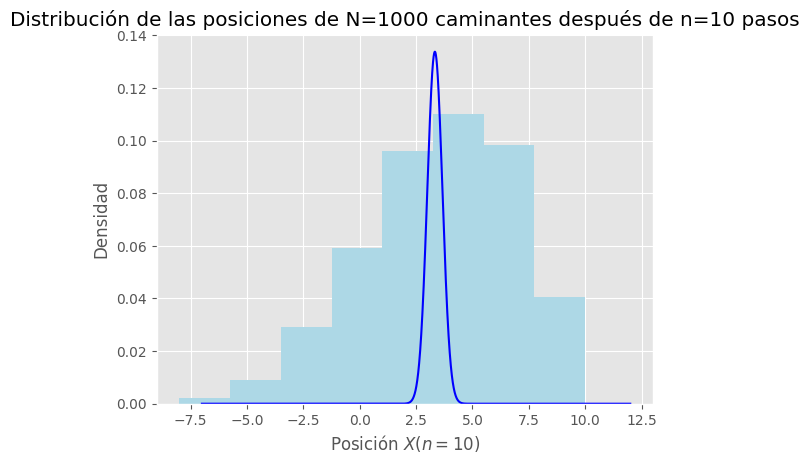

In [12]:
# Con los valores hacemos un histograma
plt.hist(datos2, bins=8, label="Histograma $X_i(n=10)$", color="#ADD8E6", density=True)

X_gaussian = np.linspace(-7, 12, 10000)
Y_gaussian = [gaussian(x,n,p,q,L) for x in X_gaussian]

plt.plot(X_gaussian, Y_gaussian, "blue", label="Función Gaussiana ($n=10, L=1$)")
plt.title("Distribución de las posiciones de N=1000 caminantes después de n=10 pasos")
plt.xlabel("Posición $X(n=10)$")
plt.ylabel("Densidad")
plt.show()

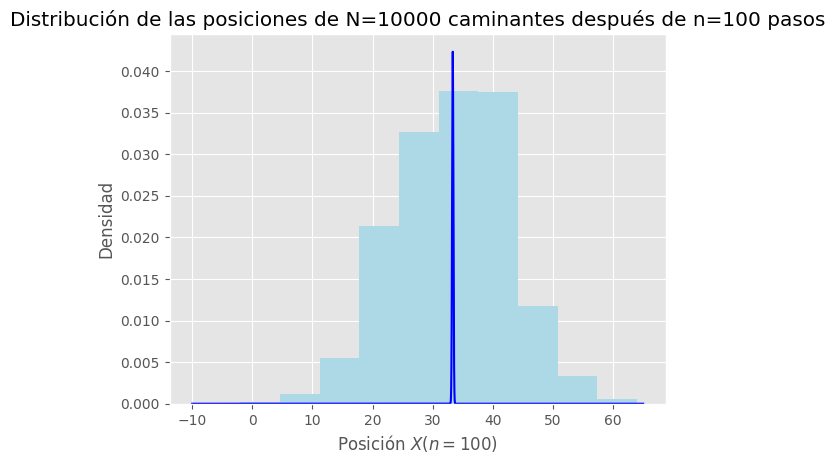

In [13]:
# Repetimos la gráfica anterior ahora con n=100 y N=10000
n= 100
N= 10000
datos3 = pd.DataFrame(corrida(N, n, x0, q))
datos3 = datos3[n].to_list()

plt.hist(datos3, label="Histograma $X_i(n=100)$", color="#ADD8E6", density=True)

X_gaussian = np.linspace(-10, 65, 10000)
Y_gaussian = [gaussian(x,n,p,q,L) for x in X_gaussian]

plt.plot(X_gaussian, Y_gaussian, "blue", label="Función Gaussiana ($n=100, L=1$)")
plt.title("Distribución de las posiciones de N=10000 caminantes después de n=100 pasos")
plt.xlabel("Posición $X(n=100)$")
plt.ylabel("Densidad")
plt.show()

In [20]:
# Notemos que el valor promedio de los caminantes en el 100th paso es
vm_experimental = np.mean(datos3)
print("Valor experimental: " + str(vm_experimental))
# y esto lo comparamos con el valor medio teorico dado por nL(q-p)
vm_teorico = n*L*(p-q)
print("Valor teorico: " + str(vm_teorico))
# deforma que la diferencia es de tan solo
error_relativo = (vm_teorico-vm_experimental)/vm_teorico
print("Error relativo: " + str(error_relativo*100) + "%")

Valor experimental: 33.262
Valor teorico: 33.33333333333333
Error relativo: 0.21399999999998448%


In [22]:
#Analogamente para la varianza
var_experimental = np.var(datos3)
var_teorico = 4*p*q*n*L**2
error_relativo = (var_teorico - var_experimental)/var_teorico
print("Valor experimental: " + str(var_experimental))
print("Valor teorico: " + str(var_teorico))
print("Error relativo: " + str(error_relativo*100) + "%")

Valor experimental: 87.69855600000001
Valor teorico: 88.88888888888889
Error relativo: 1.3391244999999845%
